In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
video_path = '/content/drive/MyDrive/ToKillAMockingBird.mp4'

In [ ]:
!pip install opencv-python matplotlib


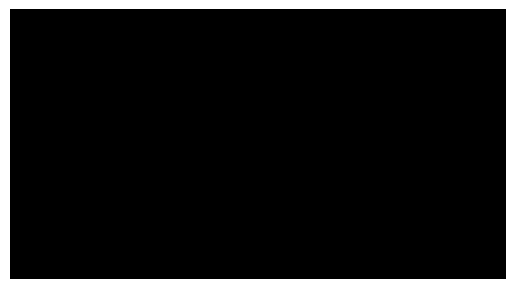

In [ ]:
import cv2
import matplotlib.pyplot as plt
# This imports the OpenCV library (cv2) for video processing and the matplotlib.pyplot library for displaying images.

cap = cv2.VideoCapture(video_path) #This line creates a VideoCapture object, cap, which is used to open the video file specified by video_path.
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    ret, frame = cap.read() #if the video file opens successfully, this line reads the first frame from the video.
                            #The ret variable is a boolean that indicates if the frame was read successfully, and frame contains the image data.

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#This checks if the frame was read successfully. If it was, it converts the frame from BGR (OpenCV's default color format) to RGB (used by Matplotlib).
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()
#These lines display the frame using Matplotlib. plt.axis('off') removes the axis ticks and labels for a cleaner display.
    else:
        print("Errorrr")

cap.release() #This releases the video capture object, freeing up any resources it was using.


In [ ]:
cap = cv2.VideoCapture(video_path)

total_frames = 1000 #This variable sets a limit of 1000 frames for processing from the video.

for grid_start in range(0, total_frames, 100): #This loop iterates through the video in increments of 100 frames. The variable grid_start will take values 0, 100, 200, ..., up to 900.
    fig, axes = plt.subplots(10, 10, figsize=(20, 20)) #This creates a 10x10 grid of subplots (a total of 100 subplots) using Matplotlib, with each subplot having a size of 20x20 inches.
    axes = axes.flatten() #axes.flatten() converts the 2D array of axes into a 1D array for easier indexing.

    for i in range(100):
        ret, frame = cap.read()
        if not ret:
            break
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) #Converts the frame from BGR (OpenCV's default) to RGB format for proper color representation in Matplotlib.
        axes[i].imshow(frame_rgb) #shows the RGB image.
        axes[i].axis('off') #hides the axes for a cleaner look.
        axes[i].set_title(f'Frame {grid_start + i + 1}', fontsize=8) #sets the title of the subplot to indicate the frame number, formatted as Frame X.

    plt.tight_layout() #plt.tight_layout() adjusts subplot parameters to give a neat layout, avoiding overlap.
    plt.show() #plt.show() displays the grid of frames.

cap.release()

Output hidden; open in https://colab.research.google.com to view.

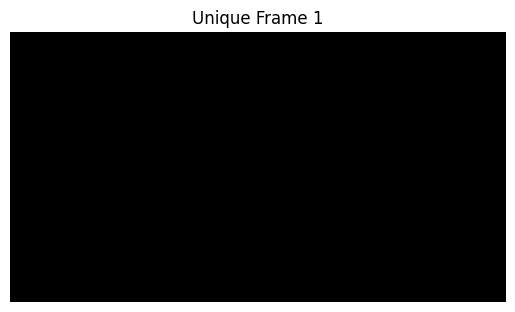

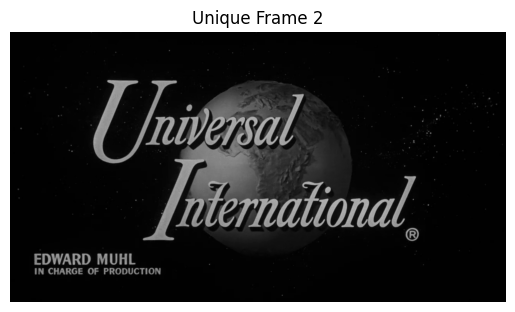

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

cap = cv2.VideoCapture(video_path)
total_frames = 100
unique_frames = []
previous_frame = None
similarity_values = []

for _ in range(total_frames):
    ret, frame = cap.read()
    if not ret:
        break

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if previous_frame is not None:
        # Compute SSIM between the current frame and the previous frame
        similarity = ssim(previous_frame, frame_rgb, multichannel=True, win_size=3)
        similarity_values.append(similarity)  # Store the similarity value


        # Threshold for similarity (adjust as needed)
        if similarity < 0.5:  # Change this value based on how similar you want to consider frames
            unique_frames.append(frame_rgb)
            previous_frame = frame_rgb
    else:
        unique_frames.append(frame_rgb)
        previous_frame = frame_rgb
        similarity_values.append(None)  # No similarity value for the first frame
cap.release()

# Now unique_frames contains only the unique frames
# You can display or process them as needed
for i, frame in enumerate(unique_frames):
    plt.imshow(frame)
    similarity_text = f'Similarity: {similarity_values[i]:.2f}' if similarity_values[i] is not None else 'First Frame'
    plt.axis('off')
    plt.title(f'Unique Frame {i + 1}')
    plt.show()


Saved: unique_frames/unique_frame_1.png
Saved: unique_frames/unique_frame_2.png
Saved: unique_frames/unique_frame_3.png
Saved: unique_frames/unique_frame_4.png
Saved: unique_frames/unique_frame_5.png
Saved: unique_frames/unique_frame_6.png
Saved: unique_frames/unique_frame_7.png
Saved: unique_frames/unique_frame_8.png
Saved: unique_frames/unique_frame_9.png
Saved: unique_frames/unique_frame_10.png
Saved: unique_frames/unique_frame_11.png
Saved: unique_frames/unique_frame_12.png


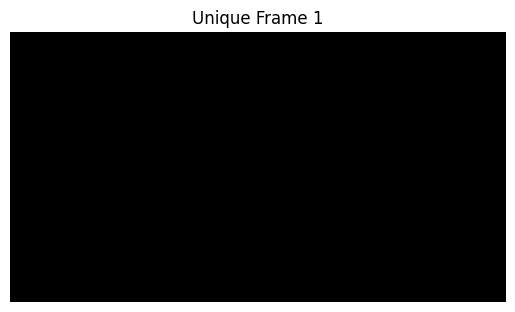

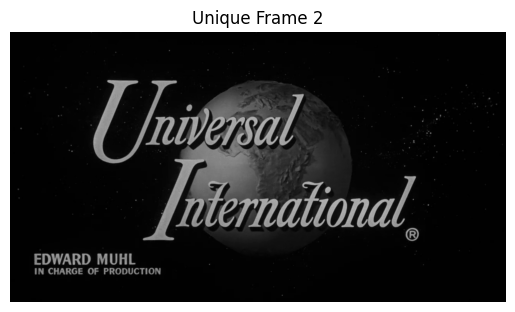

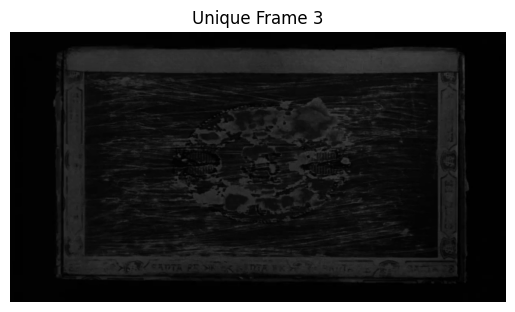

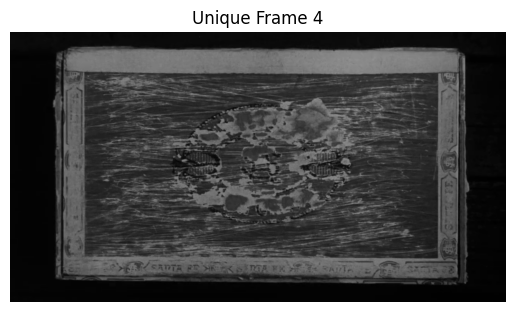

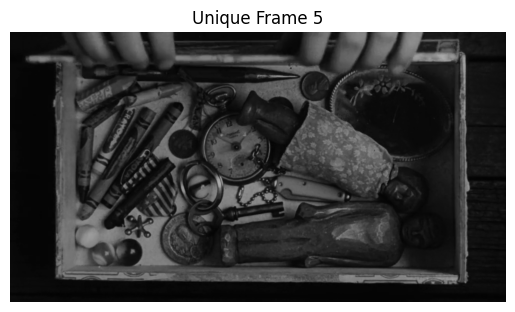

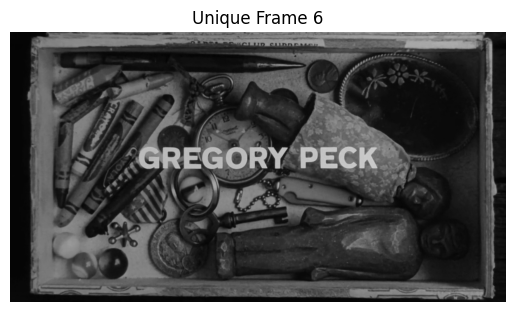

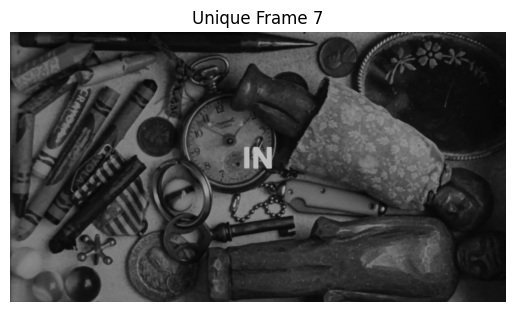

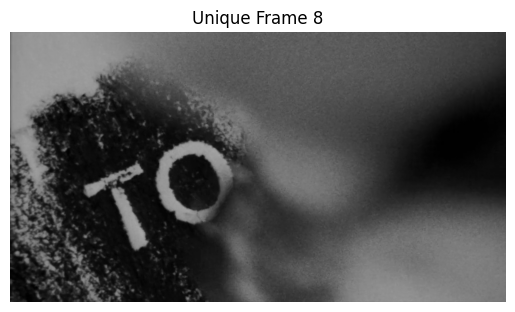

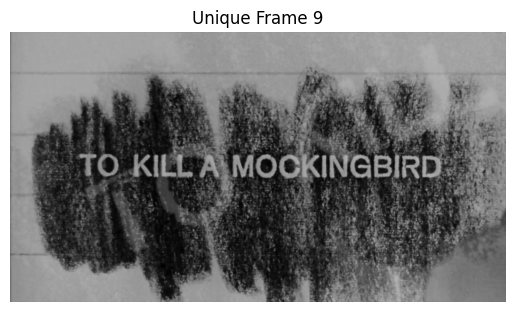

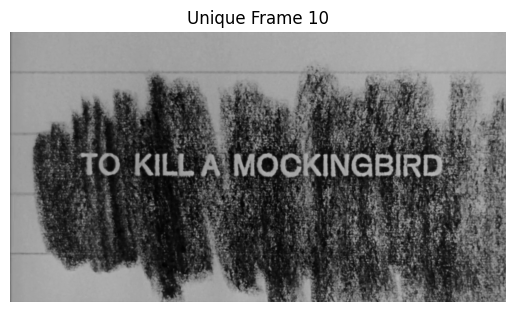

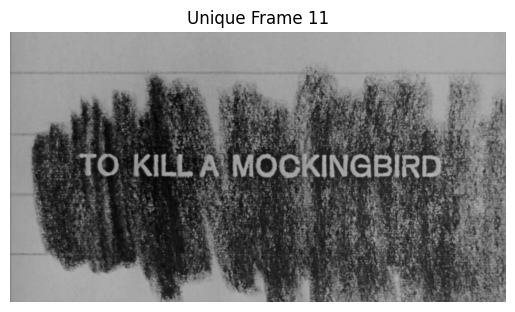

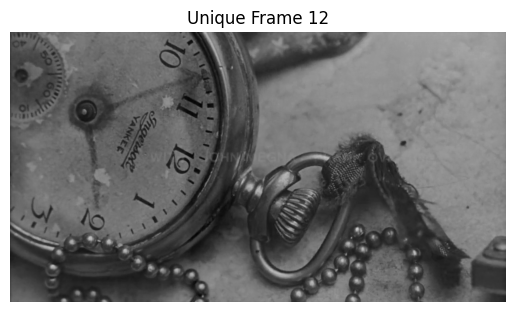

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import os

# Create a directory to save unique frames
output_dir = 'unique_frames'
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    unique_frames = []
    previous_frame = None
    total_frames = 2000  # Set the total number of frames to process
    batch_size = 100

    for grid_start in range(0, total_frames, batch_size):
        frames_batch = []

        # Read the next batch of frames
        for _ in range(batch_size):
            ret, frame = cap.read()
            if not ret:
                break
            frames_batch.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        if not frames_batch:
            break  # Exit if no more frames are read

        # Process each frame in the current batch
        for frame in frames_batch:
            if previous_frame is not None:
                similarity = ssim(previous_frame, frame, multichannel=True, win_size=3)

                if similarity < 0.4:  # Adjust threshold as needed
                    unique_frames.append(frame)
                    previous_frame = frame
            else:
                unique_frames.append(frame)
                previous_frame = frame

    cap.release()  # Release the video capture object

# Save unique frames
for i, frame in enumerate(unique_frames):
    output_path = os.path.join(output_dir, f'unique_frame_{i + 1}.png')
    cv2.imwrite(output_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))  # Convert back to BGR for saving
    print(f'Saved: {output_path}')


# Display unique frames
for i, frame in enumerate(unique_frames):
    plt.imshow(frame)
    plt.axis('off')
    plt.title(f'Unique Frame {i + 1}')
    plt.show()